## 1- Espressioni ben parentesizzate

Data una generica stringa contenente tutti i caratteri della tastiera, ritorna true se la stringa è ben parentesizzata, false altrimenti. Le parentesi più interne possono contenere stringhe generiche (vedi esempio sotto).
I caratteri da considerarsi parentesi sono “()”, “[]”, “{}”.
Nonostante ciò, la funzione deve essere scalabile ed adattarsi facilmente ad interpretare nuovi simboli di parentesi, ad esempio “<>”.
Esempi di espressione ben parentesizzata: {[stringa](ben){parentesizzata}}, {{{{[str](([ben])[par])}}}}
Esempi di espr. non ben parentesizzata: {[}], [[), ((())


In [1]:
def validate(str, apri_par,chiudi_par):
    print('Input è ',str)
    ret = True
    stack = []
    
    for car in str:

        if car in apri_par and ret:
            stack +=[car]
            #str.index()
        # caso in cui ci troviamo la chiusura delle parentesi   
        elif car in chiudi_par:
            # se lo stack è vuoto, è inutile analizzare, non posso avere parentesi di chiusura senza quelle di apertura
            if not len(stack) :
                ret = False
            else:
                # prendo il tipo di parentesi che è nel top dello stack
                top = stack.pop()
                # e lo confronto con il carattere a quella posizione, ma della lista opposta 
                balancing_br = apri_par[chiudi_par.index(car)]
                if top != balancing_br :
                    # non sono uguali, quindi ho una stringa malformata
                    ret= False
    return ret  

In [2]:
str = '{stringa{parentesizzata}}'
str2 = '{[}]'
str3 = '{{{{str}}}}'

apri_par = '{[('
chiudi_par = '}])'
       
print('Is valid string? ', validate(str, apri_par,chiudi_par))

Input è  {stringa{parentesizzata}}
Is valid string?  True


## 2- Lambdas
Scrivere utilizzando più possibile lambda functions le seguenti funzioni:

a. data una lista di tuple (‘nome’ ‘altezza’) -> [(‘giovanni’, 170), (‘francesca’, 171), … ]
    
    ritornare lista ordinata secondo il nome
    ritornare la lista ordinata secondo l’altezza
    ritornare lista che ordina secondo l’altezza, nel caso in cui due persone hanno stessa altezza ritornare in base al nome

b. data una stringa contenente un timestamp, estrarre anno, mese, giorno, ore, minuti, secondi, ritornare in forma di dizionario:
esempio: 03-10-2022,11:54:23 ->
{‘anno’: 2022, ‘mese’: 10, ‘giorno’:3, ‘ore’:11, ‘minuti’:54, ‘secondi’:23}
la funzione si deve adattare a diversi caratteri di separazione, da passare in ingresso:
separatore data = ‘-’, separatore ora = ‘:’, separatore data ora = ‘,’

c. estendere il programma del punto 2.b in modo tale da poter interpretare correttamente qualunque formato data: YYYY-MM-DD oppure YY-MM-DD oppure MM-DD-YY, ecc…

d. scrivere una funzione che identifichi stringhe palindrome


Esercizio 2.a

In [3]:
lista_tuple = [('adamo',180),('giovanni', 170), ('francesca', 171), ('aldo', 177), ('giacomo', 168),('zakaria',180),('achille',180) ]

#ordinato secondo il nome
lista_tuple.sort(key=lambda a: a[0])
print('Ordinato secondo il nome ',lista_tuple)

#Ordinato secondo l'altezza
lista_tuple.sort(key=lambda a: a[1])
print("Ordinato secondo l'altezza ",lista_tuple)

#Ordinato secondo l'altezza else secondo il nome
lista_tuple.sort(key=lambda a: a[1])
print("Ordinato secondo l'altezza ",lista_tuple)

Ordinato secondo il nome  [('achille', 180), ('adamo', 180), ('aldo', 177), ('francesca', 171), ('giacomo', 168), ('giovanni', 170), ('zakaria', 180)]
Ordinato secondo l'altezza  [('giacomo', 168), ('giovanni', 170), ('francesca', 171), ('aldo', 177), ('achille', 180), ('adamo', 180), ('zakaria', 180)]
Ordinato secondo l'altezza  [('giacomo', 168), ('giovanni', 170), ('francesca', 171), ('aldo', 177), ('achille', 180), ('adamo', 180), ('zakaria', 180)]


Esercizio 2.b

In [ ]:
def ordine(data):
    

In [151]:
from datetime import datetime

def data(data_input, separatore_data,separatore_ora,separatore_data_ora):
    
    #print(data_input.split(separatore_data_ora))
    data,ora = data_input.split(separatore_data_ora)
    
    dict_returned = [{'giorno':giorno, 'mese':mese, 'anno':anno} for giorno,mese,anno in [data.split(separatore_data)]]+[{'ore':ore, 'minuti':minuti, 'secondi':secondi} for ore,minuti,secondi in [ora.split(separatore_ora)]]
    ret = dict_returned[0]
    ret.update(dict_returned[1])
    return ret


def data_format(data_input, separatore_data,separatore_ora,separatore_data_ora, formato):
    
    #print(data_input.split(separatore_data_ora))
    data,ora = data_input.split(separatore_data_ora)
    
    ordine = formato.split('-')
    returned = {}
    
    for primo,secondo,terzo in [data.split(separatore_data)]:
        if 'Y' in ordine[0]:
            returned.update({'anno': primo})
        if 'M' in ordine[0]:
            returned.update({'mese': primo})
        if 'D' in ordine[0]:
            returned.update({'giorno': primo})
        if 'Y' in ordine[1]:
            returned.update({'anno': secondo})
        if 'M' in ordine[1]:
            returned.update({'mese': secondo})
        if 'D' in ordine[1]:
            returned.update({'giorno': secondo})
        if 'Y' in ordine[2]:
            returned.update({'anno': terzo})
        if 'M' in ordine[2]:
            returned.update({'mese': terzo})
        if 'D' in ordine[2]:
            returned.update({'giorno': terzo})
    
       

    temp = [{'ore':ore, 'minuti':minuti, 'secondi':secondi} for ore,minuti,secondi in [ora.split(separatore_ora)]]
    returned.update(temp[0])
    return returned

In [152]:
data_input = '03-10-2022,11:54:23'
data_input2 = '03-2022-10,11:54:23'
separatore_data = '-' 
separatore_ora = ':' 
separatore_data_ora = ','


returned_value =data(data_input,separatore_data,separatore_ora,separatore_data_ora)
print(returned_value)
print(data_format(data_input2,separatore_data,separatore_ora,separatore_data_ora,'MM-YYYY-DD'))

{'giorno': '03', 'mese': '10', 'anno': '2022', 'ore': '11', 'minuti': '54', 'secondi': '23'}
{'mese': '03', 'anno': '2022', 'giorno': '10', 'ore': '11', 'minuti': '54', 'secondi': '23'}


Esecizio 2d

In [153]:
stringa_input = 'anna'
if stringa_input == stringa_input[::-1] :
    print("Palindromo")
else:
    print("Non Palindromo")

Palindromo


## Esercizio 3

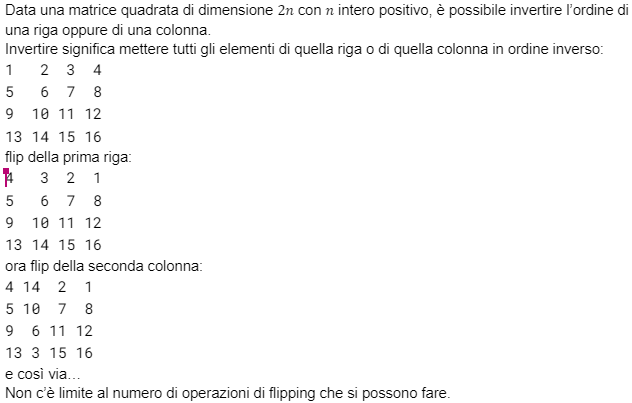

In [237]:
from random import randrange
import numpy as np
# numero che indica la grandezza della matrice
n = 4

matrice= [[randrange(50) for _ in range(n)] for _ in range(n)]
print(f'Matrice prima della modifica:\n{matrice}')

# indica quale delle righe modificare
riga = 2
matrice[riga] = list(np.flip(matrice[riga]))

print(f'Matrice dopo la modifica:\n{matrice}')




colonna = 0

for i in range(int(len(matrice)/2)):
    for j in range(len(matrice[i])):
        
        # se mi trovo nella colonna giusta faccio il flip
        if j == colonna:
            print('matrice[i][j]',matrice[i][j],' altro valore',matrice[-1][j])
            temp = matrice[i][j]
            matrice[i][j] = matrice[-1][j]
            matrice[-1][j] = temp
            #print(temp)
        print(i,j)
   
print(matrice)
#print('\n',matrice[:] [::-1])



Matrice prima della modifica:
[[28, 13, 12, 13], [22, 19, 34, 45], [41, 6, 21, 30], [47, 0, 38, 14]]
Matrice dopo la modifica:
[[28, 13, 12, 13], [22, 19, 34, 45], [30, 21, 6, 41], [47, 0, 38, 14]]
matrice[i][j] 28  altro valore 47
0 0
0 1
0 2
0 3
matrice[i][j] 22  altro valore 28
1 0
1 1
1 2
1 3
[[47, 13, 12, 13], [28, 19, 34, 45], [30, 21, 6, 41], [22, 0, 38, 14]]
